# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm

In [3]:
data = pd.read_csv("direct_email_marketing_database.csv")
data.head()

upgrade_price        age  n_purchase  discount_purchase  n_reward  \
0              8  54.235729          14                 14         0   
1              8  54.235729          14                  0         0   
2              8  37.901482           3                  3         0   
3              8  37.901482           3                  0         0   
4              8  64.794633           4                  1         0   

   n_first_class  n_second_class  n_third_class  n_fourth_class  \
0              0              11              3               0   
1              0               0              0               0   
2              0               3              0               0   
3              0               0              0               0   
4              0               2              0               0   

   avg_npassengers  ...  total_revenue  conversions  n_search  n_path  \
0              1.0  ...    771700000.0           19        13       3   
1              1.0  ...    771700000.0           19        21       3   
2              1.0  ...            0.0            0         0       0   
3              1.0  ...            0.0            0         0       0   
4              1.0  ...    123200000.0            2         0       0   

    avg_hits  avg_session_duration   avg_revenue  success  Unnamed: 46  \
0  47.000000         112069.866700  5.144667e+07    False          NaN   
1  35.818182          77459.227270  3.507727e+07    False          NaN   
2        NaN                   NaN           NaN    False          NaN   
3        NaN                   NaN           NaN    False          NaN   
4   7.060606           2474.090909  1.866667e+06    False          NaN   

   Unnamed: 47  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 48 columns]

# Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38143 entries, 0 to 38142
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   upgrade_price           38143 non-null  int64  
 1   age                     38143 non-null  float64
 2   n_purchase              38143 non-null  int64  
 3   discount_purchase       38143 non-null  int64  
 4   n_reward                38143 non-null  int64  
 5   n_first_class           38143 non-null  int64  
 6   n_second_class          38143 non-null  int64  
 7   n_third_class           38143 non-null  int64  
 8   n_fourth_class          38143 non-null  int64  
 9   avg_npassengers         38143 non-null  float64
 10  avg_price               38143 non-null  float64
 11  sdt_dev_price           37410 non-null  float64
 12  avg_distance            38143 non-null  float64
 13  sdt_dev_distance        37410 non-null  float64
 14  since_last_purchase     38143 non-null

In [5]:
data.isna().sum()

upgrade_price                 0
age                           0
n_purchase                    0
discount_purchase             0
n_reward                      0
n_first_class                 0
n_second_class                0
n_third_class                 0
n_fourth_class                0
avg_npassengers               0
avg_price                     0
sdt_dev_price               733
avg_distance                  0
sdt_dev_distance            733
since_last_purchase           0
n_sent_reminder               0
n_open_reminder               0
avg_opens_reminder            0
n_click_reminder              0
avg_clicks_reminder           0
n_sent_upgrade                0
n_open_upgrade                0
avg_opens_upgrade             0
n_click_upgrade               0
avg_clicks_upgrade            0
n_sent_discount               0
n_open_discount               0
avg_opens_discount            0
n_click_discount              0
avg_clicks_discount           0
price                         0
days_2_t

In [6]:
data.fillna(data.mean(), inplace=True) 

In [7]:
data.isna().sum()

upgrade_price                 0
age                           0
n_purchase                    0
discount_purchase             0
n_reward                      0
n_first_class                 0
n_second_class                0
n_third_class                 0
n_fourth_class                0
avg_npassengers               0
avg_price                     0
sdt_dev_price                 0
avg_distance                  0
sdt_dev_distance              0
since_last_purchase           0
n_sent_reminder               0
n_open_reminder               0
avg_opens_reminder            0
n_click_reminder              0
avg_clicks_reminder           0
n_sent_upgrade                0
n_open_upgrade                0
avg_opens_upgrade             0
n_click_upgrade               0
avg_clicks_upgrade            0
n_sent_discount               0
n_open_discount               0
avg_opens_discount            0
n_click_discount              0
avg_clicks_discount           0
price                         0
days_2_t

In [8]:
data['is_second_class'] = data['is_second_class'].astype(int)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38143 entries, 0 to 38142
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   upgrade_price           38143 non-null  int64  
 1   age                     38143 non-null  float64
 2   n_purchase              38143 non-null  int64  
 3   discount_purchase       38143 non-null  int64  
 4   n_reward                38143 non-null  int64  
 5   n_first_class           38143 non-null  int64  
 6   n_second_class          38143 non-null  int64  
 7   n_third_class           38143 non-null  int64  
 8   n_fourth_class          38143 non-null  int64  
 9   avg_npassengers         38143 non-null  float64
 10  avg_price               38143 non-null  float64
 11  sdt_dev_price           38143 non-null  float64
 12  avg_distance            38143 non-null  float64
 13  sdt_dev_distance        38143 non-null  float64
 14  since_last_purchase     38143 non-null

# Exploratory Data Analysis (EDA)

In [10]:
print(data.describe())

       upgrade_price           age    n_purchase  discount_purchase  \
count   38143.000000  38143.000000  38143.000000       38143.000000   
mean        7.609679     40.661878     10.597148           2.204572   
std         1.187000     14.513826     12.863937           3.061286   
min         4.000000     18.334359      1.000000           0.000000   
25%         8.000000     28.142578      4.000000           1.000000   
50%         8.000000     38.153537      8.000000           1.000000   
75%         8.000000     52.023400     13.000000           3.000000   
max         8.000000    119.926140    326.000000          70.000000   

           n_reward  n_first_class  n_second_class  n_third_class  \
count  38143.000000   38143.000000    38143.000000   38143.000000   
mean       0.148337       0.611252        3.494324       0.156464   
std        0.525794       1.548337        4.449734       0.571422   
min        0.000000       0.000000        0.000000       0.000000   
25%        0.00

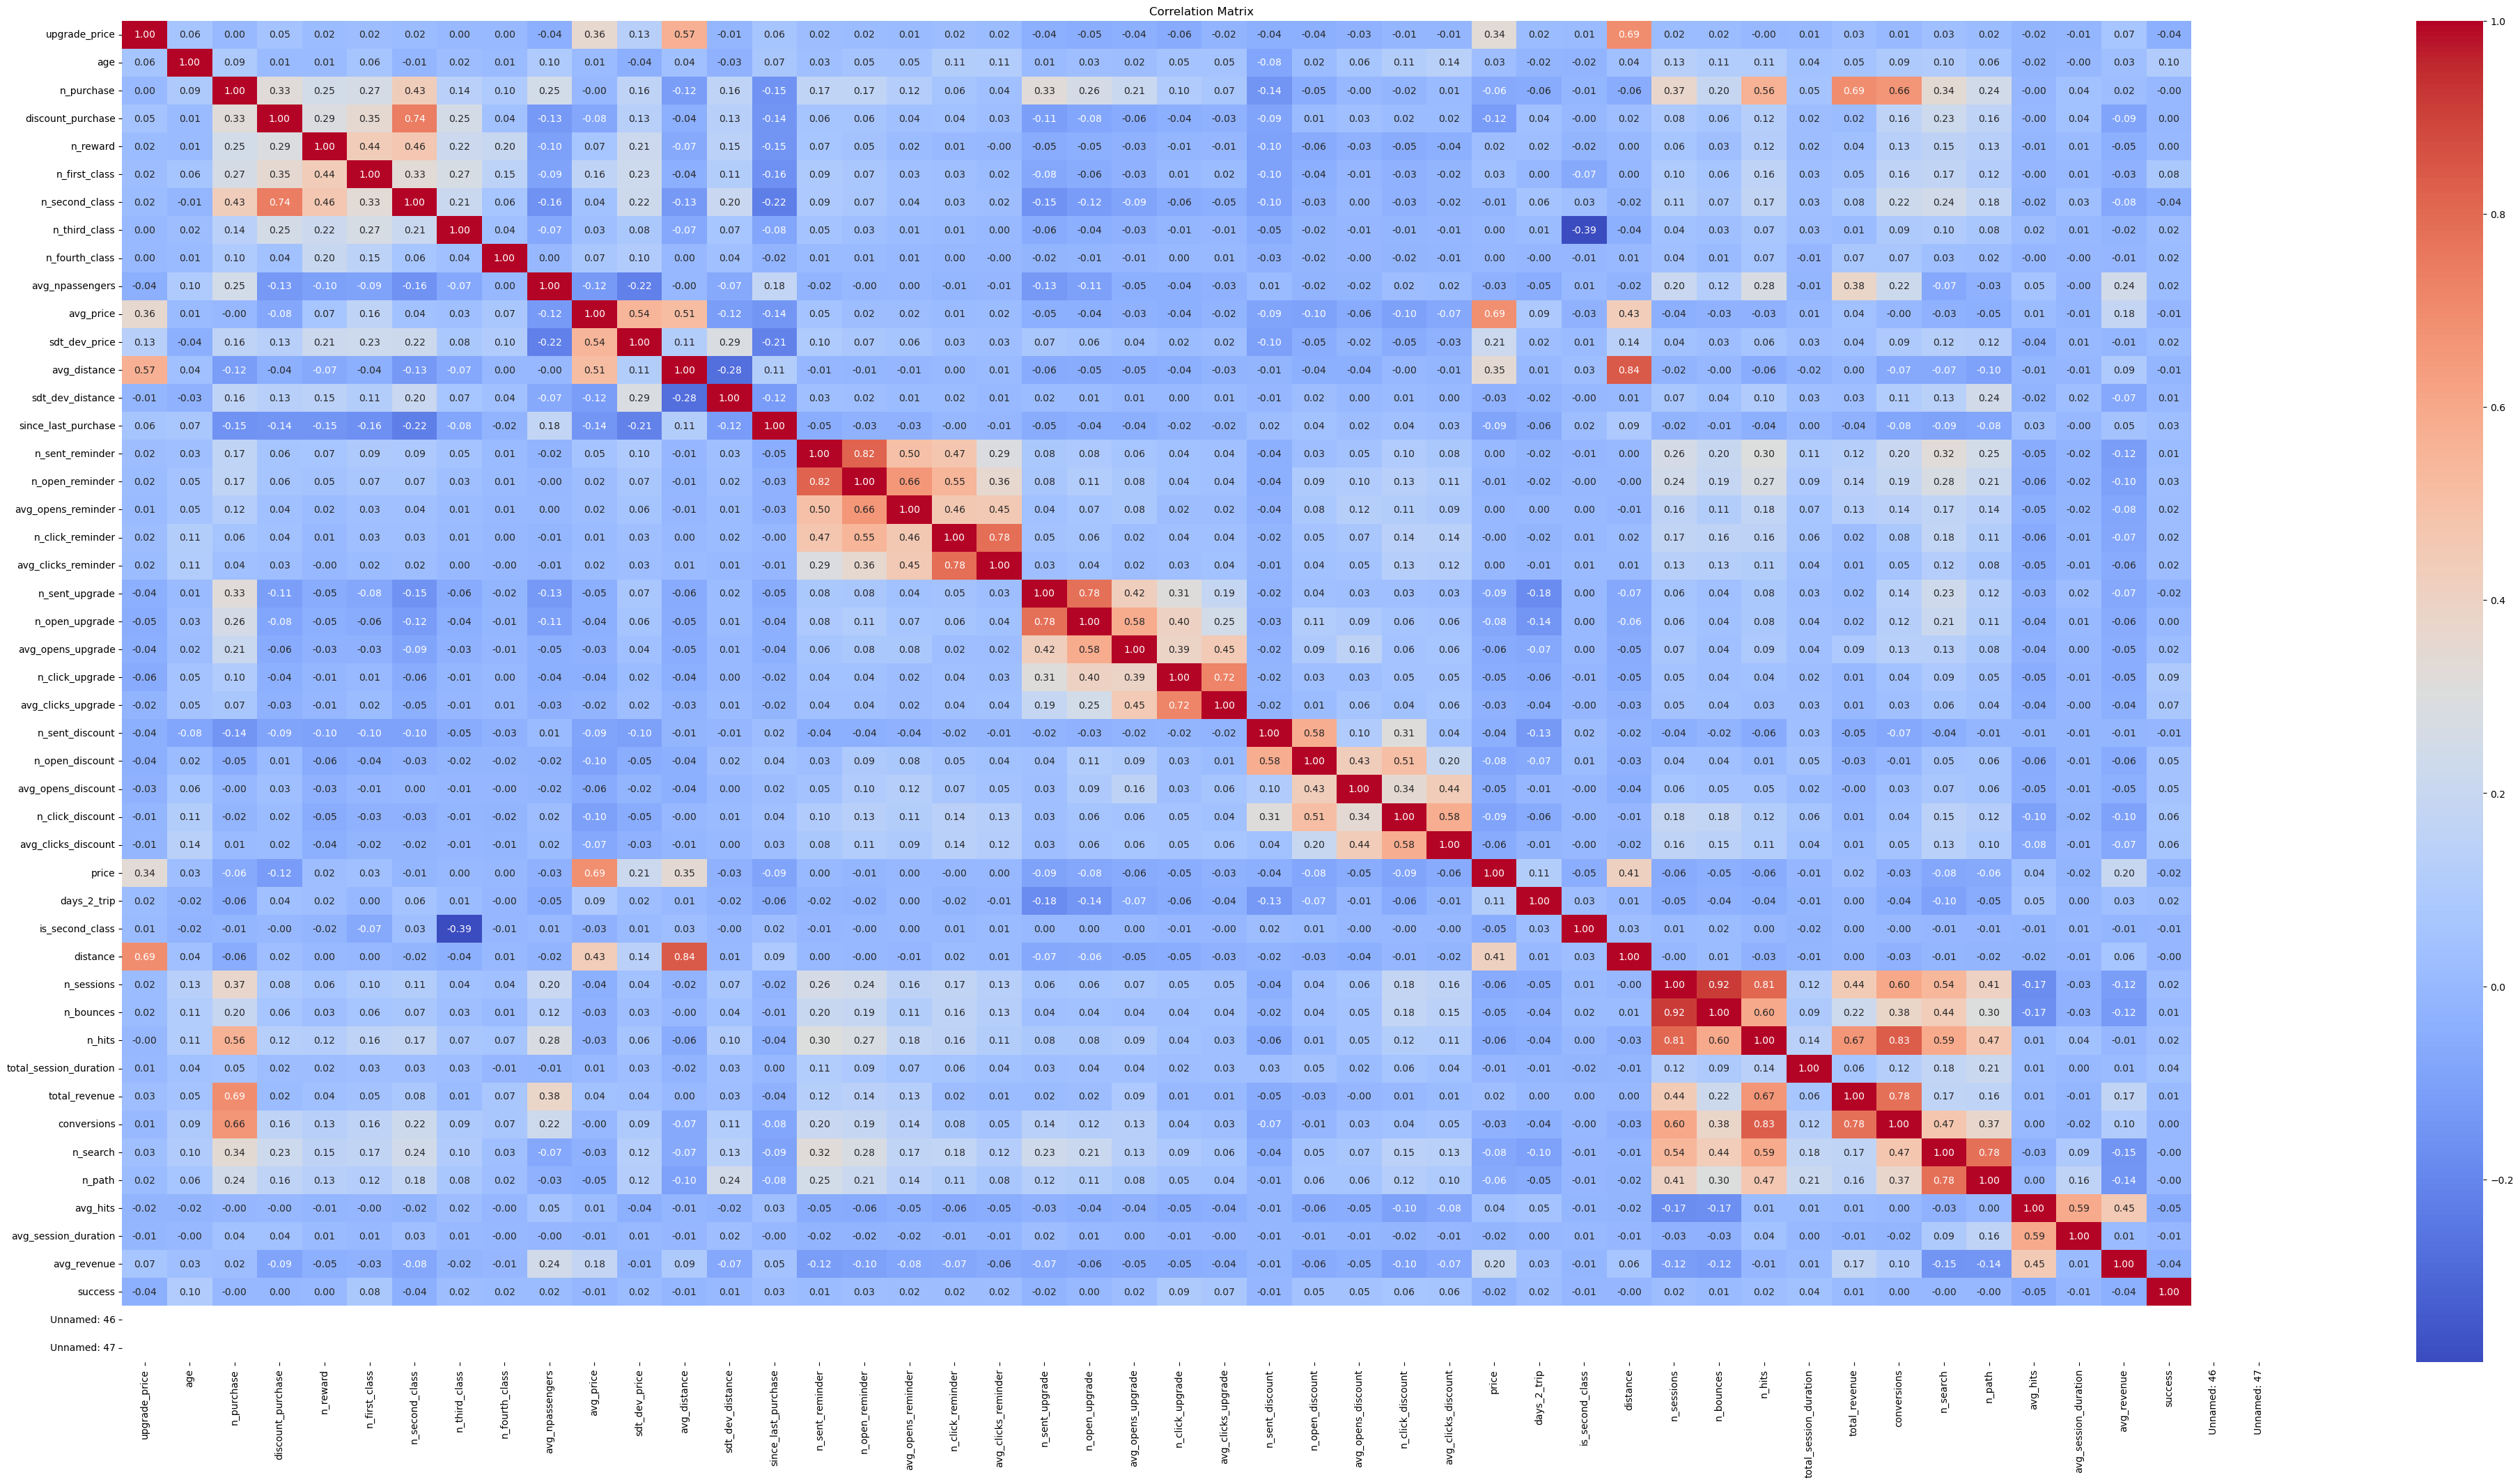

In [11]:
correlation_matrix = data.corr()

plt.figure(figsize=(50, 25))
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Customer Behaviour Analysis

In [12]:
data['success'] = data['success'].astype(int)

# Correlate email interaction metrics with trip bookings
correlation_opens_bookings = data['n_open_upgrade'].corr(data['success'])
correlation_clicks_bookings = data['n_click_upgrade'].corr(data['success'])

print(f"Correlation between email opens and bookings: {correlation_opens_bookings}")
print(f"Correlation between email clicks and bookings: {correlation_clicks_bookings}")

Correlation between email opens and bookings: 0.002767118117810885
Correlation between email clicks and bookings: 0.090778992363178


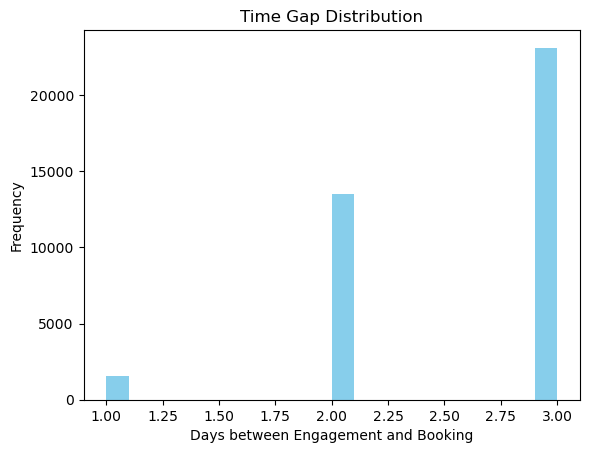

In [13]:
# Analyze time between email engagement and trip booking
data['days_between_engagement_booking'] = data['days_2_trip']

# Visualize time between engagement and booking
plt.hist(data['days_between_engagement_booking'], bins=20, color='skyblue')
plt.xlabel('Days between Engagement and Booking')
plt.ylabel('Frequency')
plt.title('Time Gap Distribution')
plt.show()

In [14]:
# Statistical tests - t-tests for impact of email interaction metrics on bookings
opens_bookings_ttest = ttest_ind(data['n_open_upgrade'], data['success'])
clicks_bookings_ttest = ttest_ind(data['n_click_upgrade'], data['success'])

print(f"T-test results for opens and bookings: {opens_bookings_ttest}")
print(f"T-test results for clicks and bookings: {clicks_bookings_ttest}")

T-test results for opens and bookings: Ttest_indResult(statistic=23.21950888304433, pvalue=7.492258659534567e-119)
T-test results for clicks and bookings: Ttest_indResult(statistic=-24.403526210071874, pvalue=5.005702010819823e-131)


# Email Marketing Optimization

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

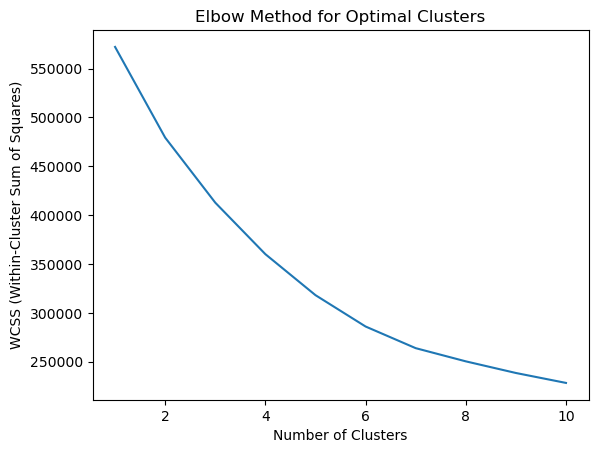

   n_sent_reminder  n_open_reminder  avg_opens_reminder  n_click_reminder  \
0         0.307800         0.219958            0.274801      1.475755e-02   
1         0.153573         0.068883            0.095695     -7.494005e-16   
2         1.715769         1.476520            2.510831      7.755808e-01   

   avg_clicks_reminder  n_sent_upgrade  n_open_upgrade  avg_opens_upgrade  \
0         1.310611e-02        1.569923    1.308855e+00       2.074926e+00   
1         5.065393e-15        0.063804    4.649059e-15       6.467049e-15   
2         8.414960e-01        0.200198    1.418685e-01       1.971330e-01   

   n_click_upgrade  avg_clicks_upgrade  n_sent_discount  n_open_discount  \
0     2.139845e-01        2.582104e-01         3.732959         2.531975   
1    -1.734723e-17        2.050443e-15         4.103384         1.575554   
2     1.581809e-02        2.174988e-02         3.805734         2.457736   

   avg_opens_discount  n_click_discount  avg_clicks_discount  
0            1

In [15]:
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

# Select relevant columns for clustering
selected_columns = ['n_sent_reminder','n_open_reminder', 'avg_opens_reminder', 'n_click_reminder', 'avg_clicks_reminder', 'n_sent_upgrade', 
                    'n_open_upgrade', 'avg_opens_upgrade', 'n_click_upgrade', 'avg_clicks_upgrade', 'n_sent_discount', 
                    'n_open_discount', 'avg_opens_discount', 'n_click_discount', 'avg_clicks_discount' ]  # Adjust with your fields

# Handle missing values if any
data[selected_columns] = data[selected_columns].fillna(0)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[selected_columns])

# Determine optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42,n_init=10)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Explore the segmented clusters
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=selected_columns)
print(cluster_centers)

In [16]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[selected_columns])

# Create KMeans model with explicit n_init value
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)  # Set n_init to your desired value

# Fit the model to the scaled data
kmeans.fit(scaled_data)

# Get cluster labels
data['Cluster'] = kmeans.labels_

# Explore the segmented clusters
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=selected_columns)
print(cluster_centers)

   n_sent_reminder  n_open_reminder  avg_opens_reminder  n_click_reminder  \
0         0.307800         0.219958            0.274801      1.475755e-02   
1         0.153573         0.068883            0.095695     -7.494005e-16   
2         1.715769         1.476520            2.510831      7.755808e-01   

   avg_clicks_reminder  n_sent_upgrade  n_open_upgrade  avg_opens_upgrade  \
0         1.310611e-02        1.569923    1.308855e+00       2.074926e+00   
1         5.079270e-15        0.063804    4.649059e-15       6.467049e-15   
2         8.414960e-01        0.200198    1.418685e-01       1.971330e-01   

   n_click_upgrade  avg_clicks_upgrade  n_sent_discount  n_open_discount  \
0     2.139845e-01        2.582104e-01         3.732959         2.531975   
1    -1.734723e-17        2.053913e-15         4.103384         1.575554   
2     1.581809e-02        2.174988e-02         3.805734         2.457736   

   avg_opens_discount  n_click_discount  avg_clicks_discount  
0            1

In [17]:
# Select relevant columns for clustering and visualization
selected_columns1 = ['n_sent_reminder','n_open_reminder', 'avg_opens_reminder', 'n_click_reminder', 'avg_clicks_reminder', 'n_sent_upgrade', 
                    'n_open_upgrade', 'avg_opens_upgrade', 'n_click_upgrade', 'avg_clicks_upgrade', 'n_sent_discount', 
                    'n_open_discount', 'avg_opens_discount', 'n_click_discount', 'avg_clicks_discount'] # Handle missing values if any
data[selected_columns1] = data[selected_columns1].fillna(0)

In [18]:
# Standardize the data
scaler1 = StandardScaler()
scaled_data1 = scaler1.fit_transform(data[selected_columns1])

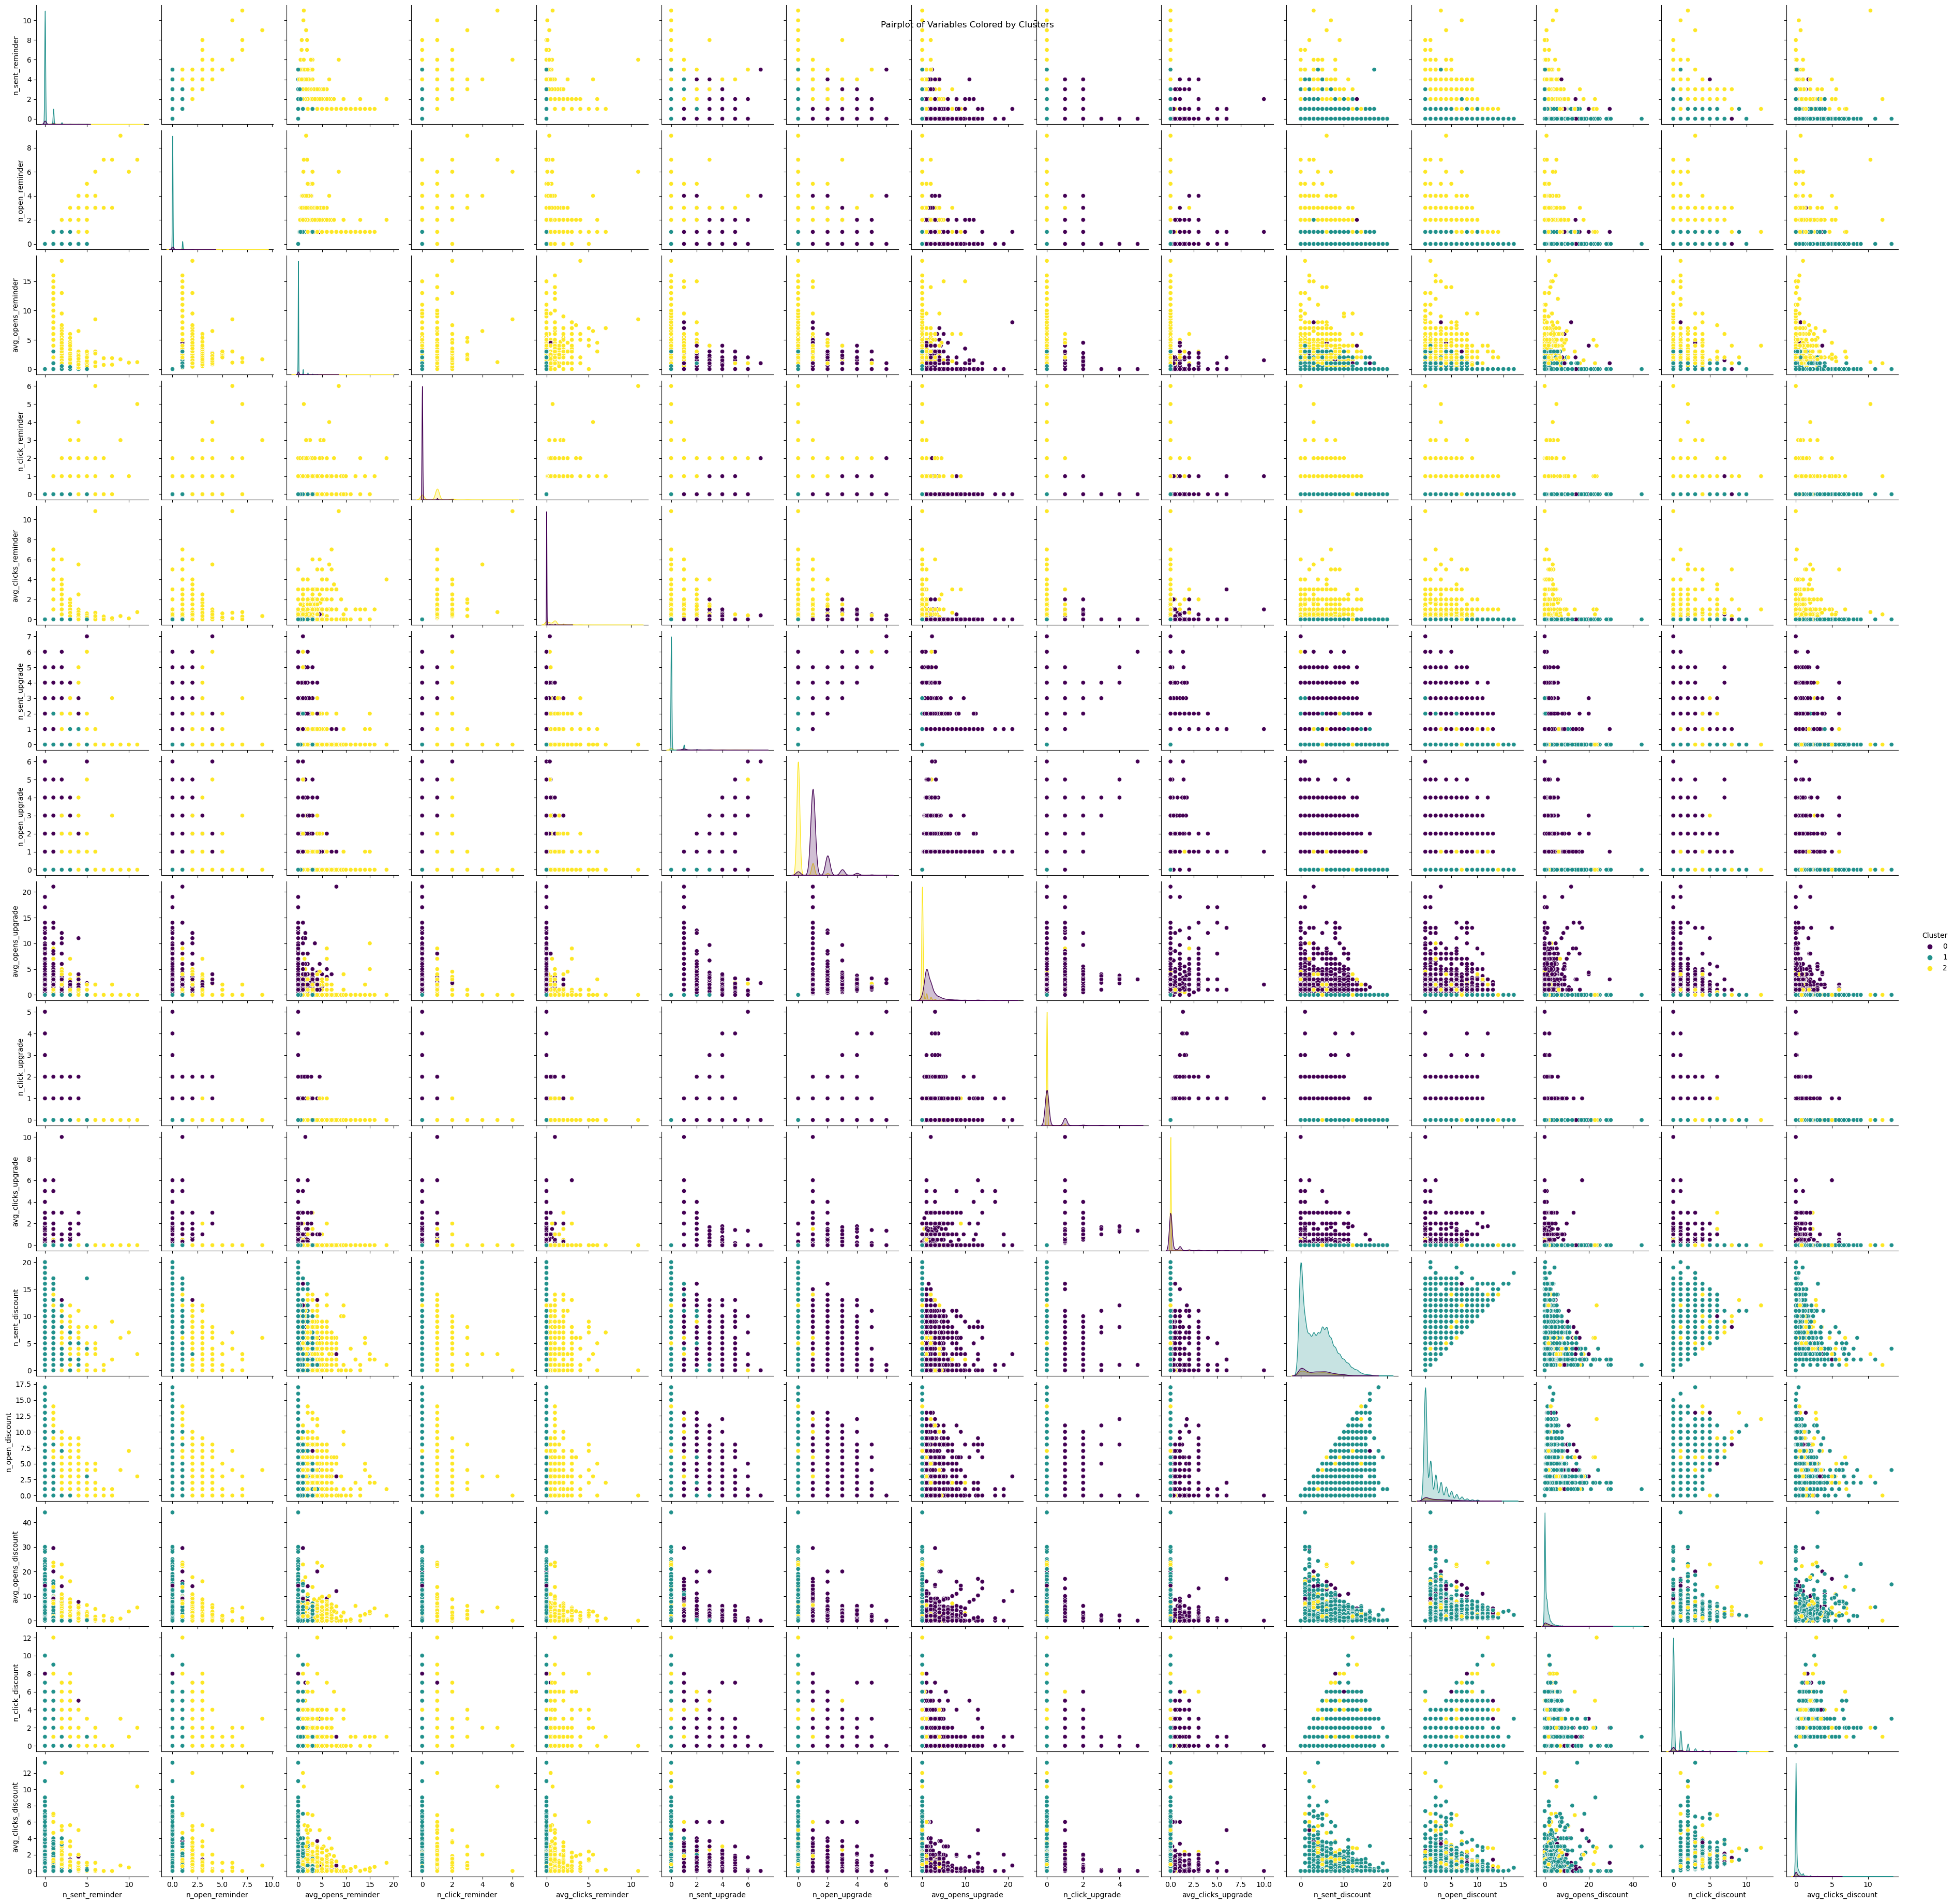

In [19]:
# Create KMeans model
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
kmeans.fit(scaled_data1)

# Add cluster labels to the dataset
data['Cluster1'] = kmeans.labels_

# Pairplot to visualize relationships between variables colored by clusters
sns.pairplot(data, vars=selected_columns1, hue='Cluster', palette='viridis')
plt.suptitle('Pairplot of Variables Colored by Clusters')
plt.show()

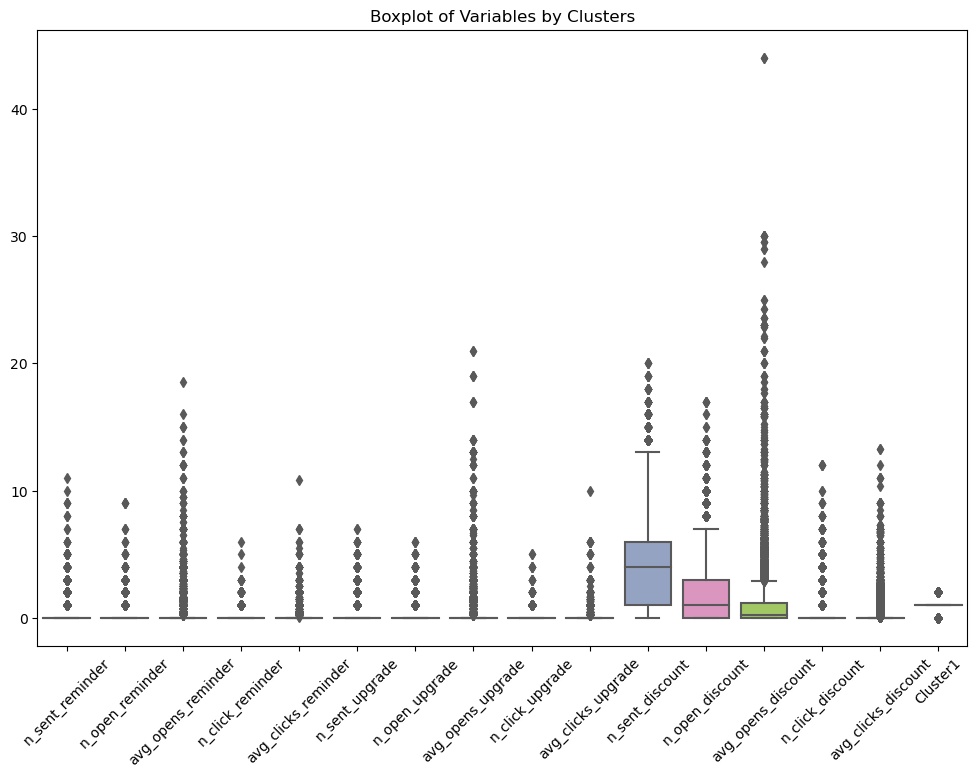

In [20]:
# Boxplot of each variable colored by clusters
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[selected_columns1 + ['Cluster1']], palette='Set2')
plt.title('Boxplot of Variables by Clusters')
plt.xticks(rotation=45)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


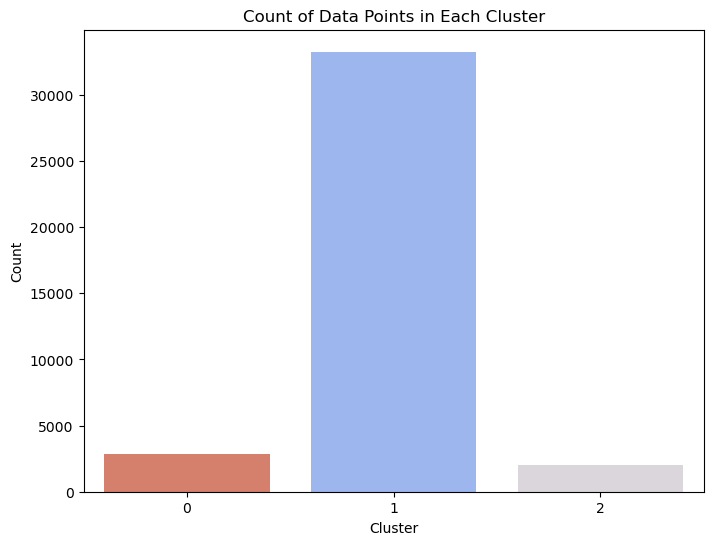

In [33]:
# Count plot of clusters
plt.figure(figsize=(8, 6))
sns.countplot(data['Cluster1'], palette = ['#e6745c', '#90b1fa', '#dbd5dc'])
plt.title('Count of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

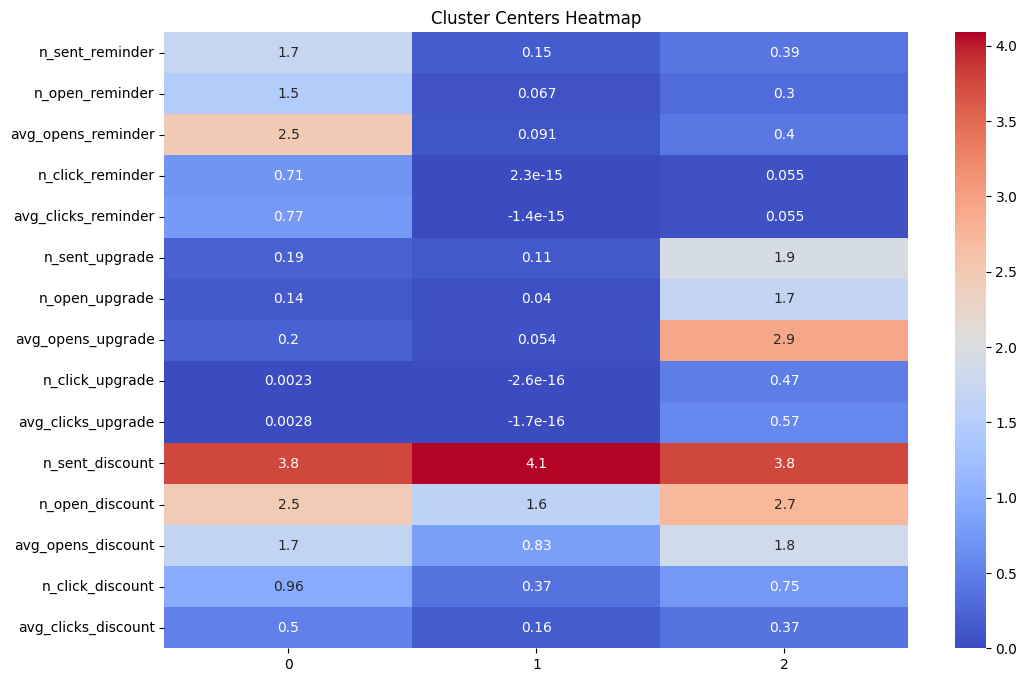

In [21]:
# Heatmap of cluster centers
cluster_centers1 = pd.DataFrame(scaler1.inverse_transform(kmeans.cluster_centers_), columns=selected_columns1)
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers1.transpose(), cmap='coolwarm', annot=True)
plt.title('Cluster Centers Heatmap')
plt.show()

# Web Session Analysis

In [23]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# Select relevant columns for sequence mining
web_session_columns = [
    'n_sessions', 'n_bounces', 'n_hits', 'avg_hits', 'total_session_duration',
    'avg_session_duration', 'total_revenue', 'avg_revenue', 'conversions',
    'n_search', 'n_path'
]

# Handle missing values if any
data[web_session_columns] = data[web_session_columns].fillna(0)

# Convert relevant columns into a sequence for sequence mining
sequence_data = data[web_session_columns].astype(str)

# Convert the sequences to a list of lists
sequences = sequence_data.values.tolist()

# Transform the list of lists into a transaction-encoded array
te = TransactionEncoder()
te_ary = te.fit(sequences).transform(sequences)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# Display the frequent itemsets
print(frequent_itemsets)


     support                                           itemsets
0   0.588129                                                (0)
1   0.333377                                              (0.0)
2   0.233568                                                (1)
3   0.101644                                               (10)
4   0.131662                                               (12)
5   0.331778                                                (2)
6   0.195816                               (28.447729415880584)
7   0.195816                               (29638145.315408185)
8   0.204651                                                (3)
9   0.311276                                                (4)
10  0.119786                                                (5)
11  0.193011                                                (6)
12  0.189078                                                (8)
13  0.195816                                 (90989.6266574465)
14  0.333010                            

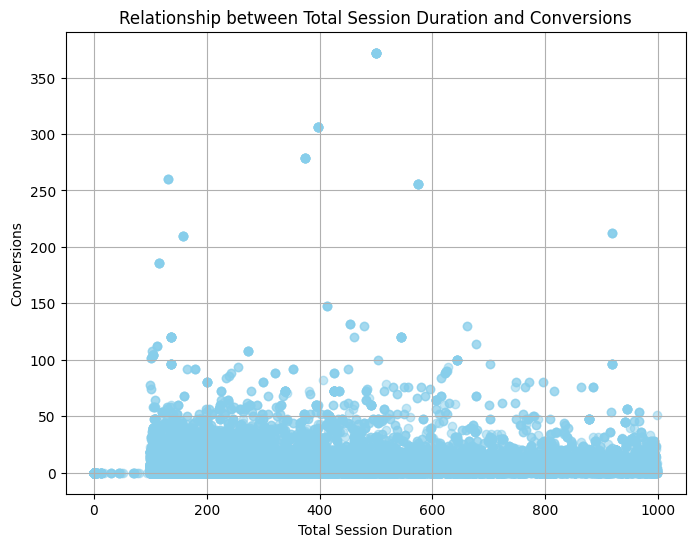

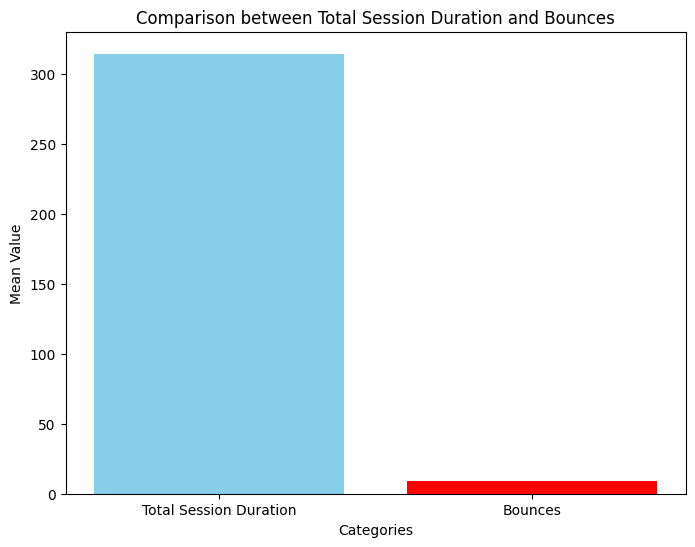

In [28]:
import matplotlib.pyplot as plt

# Scatter plot: total_session_duration vs conversions
plt.figure(figsize=(8, 6))
plt.scatter(data['total_session_duration'], data['conversions'], color='skyblue', alpha=0.5)
plt.xlabel('Total Session Duration')
plt.ylabel('Conversions')
plt.title('Relationship between Total Session Duration and Conversions')
plt.grid(True)
plt.show()

# Bar plot: total_session_duration vs n_bounces
plt.figure(figsize=(8, 6))
plt.bar(['Total Session Duration', 'Bounces'], [data['total_session_duration'].mean(), data['n_bounces'].mean()], color=['skyblue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Mean Value')
plt.title('Comparison between Total Session Duration and Bounces')
plt.show()


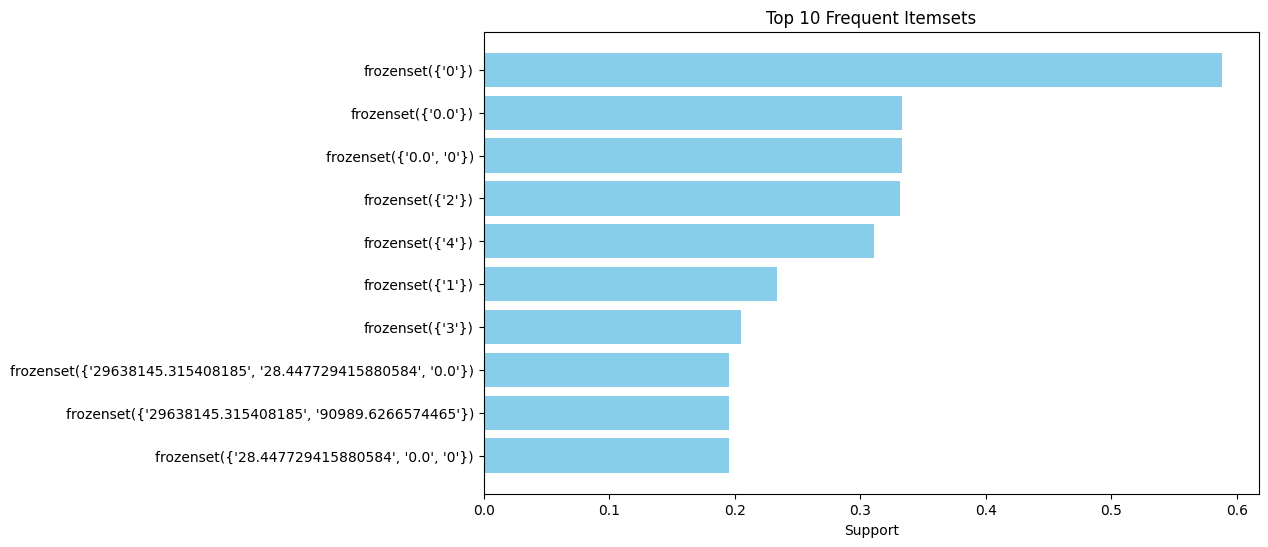

In [25]:
# Plotting top frequent itemsets
top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_itemsets['itemsets'].astype(str), top_itemsets['support'], color='skyblue')
plt.xlabel('Support')
plt.title('Top 10 Frequent Itemsets')
plt.gca().invert_yaxis()
plt.show()